In [1]:
from torch.utils.data import DataLoader
import time
import torch
from embeddings import EmbeddingSummation
from BookDataset import getBookDataset, BookDataset, NameSpace

In [2]:
train, val, test, featureSizes = getBookDataset('../Data_Train.xlsx', '../Data_Test.xlsx')
train.head()

,Title,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,author_0,author_1,author_2,author_3,author_4
3779,Rejuvenate Yourself: Nature - Vol. 1: Volume 1,0.0,0.599695,0.686913,"Based on the concept of colour therapy, Rejuve...",100,2,4.804021,119,1,1,1,1
3083,I Have Lost My Way,0.0,1.000000,0.263277,"A brand-new, heart-wrenching novel from the be...",2,1,5.386969,151,1,1,1,1
4957,Furious Hours,0.0,0.656100,0.331453,‘It’s been a long time since I picked up a boo...,195,6,5.743003,0,1,1,1,1
3654,No Mission Is Impossible: The Death-defying Mi...,1.0,0.497871,0.570797,The Death-Defying Missions of the Israeli Spec...,142,9,6.659294,0,1,1,1,1
4338,National Cyber Olympiad - Class 2 with CD: The...,0.0,1.000000,0.263277,Developed by Professionals and Experienced Tea...,72,5,4.859812,0,0,1,1,1


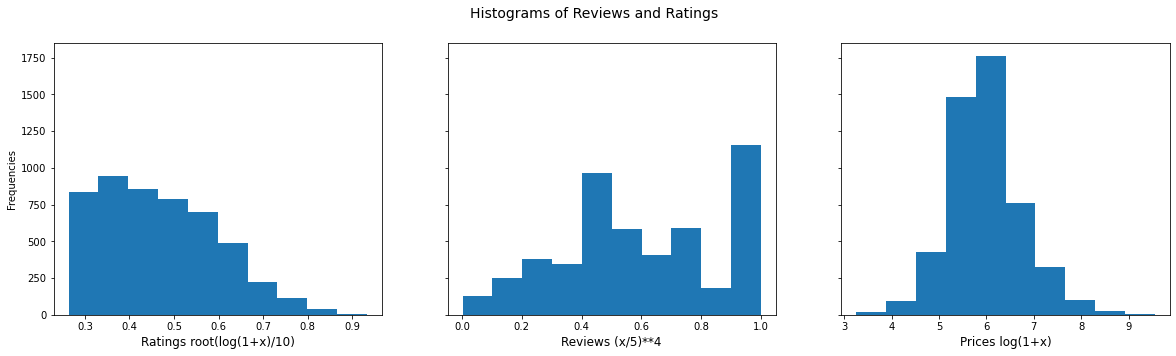

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
plt.suptitle('Histograms of Reviews and Ratings', fontsize=14)

ax1.hist(train.Ratings)
ax1.set_xlabel('Ratings root(log(1+x)/10)', fontsize=12)
ax1.set_ylabel('Frequencies')

ax2.hist(train.Reviews)
ax2.set_xlabel('Reviews (x/5)**4', fontsize=12)

ax3.hist(train.Price)
ax3.set_xlabel('Prices log(1+x)', fontsize=12);

In [4]:
loader = DataLoader(BookDataset(train), batch_size=8)
batch = next(iter(loader))
print(list(batch.keys()))

['index', 'Title', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory', 'Price', 'author_0', 'author_1', 'author_2', 'author_3', 'author_4']
